## Protein interaction network from STRING
- In this notebook you will apply the functions from the previous notebook to a protein-protein interaction notebook and learn more functions.The notebook contain in total four exercises. 
- It is related to the presentation..... 


## Installation of libraries and necessary software¶
- Code to install libraries
- State that this has to be run only once
- If necessary, further installation instructions

In [13]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import load_data as cf
import csv
from operator import itemgetter
import community 
import pandas as pd
from custom import ecdf

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data¶

- Load the two csv files: 
        insulinnetwork_nodelist.csv (contains names on protein) 
        insulinnetwork_edgelist.cvs (contains the protein-protein interactions and an interaction scores)

In [24]:
# Open the file with nodes
with open('insulinnetwork_nodelist.csv', 'r') as nodecsv:                 
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]                     

# Get a list of only the node names                                       
node_names = [n[0] for n in nodes]    

# Open the file with edges
with open('insulinnetwork_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv) 
    edges = [tuple(e) for e in edgereader][1:] 
    
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

### Exercise 1 - Basic information and drawing the network

The network has the protein Insulin as the center of the network. This means that all the other proteins are connected by edges to Insulin, but may also be connected to eachother. This is called an ego network.

Answer the question below by applying some of the commands you learned in the previous notebook. To get a high learning output you can type in the codes manually - to save time you can chose to copy-paste them instead. 

In [ ]:
# The number of nodes and edges in the network


# The first five nodes in the network


# The first five edges in the network


# Draw network with labels


# Draw subnetwork for the protein 'AKT'


# List the neighbors of 'AKT'


# Rank top 10 proteins with the highest centrality 


# Plot the degree of centrality for all of the proteins in the network

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: What is the size of the networks in terms of numbers of nodes and edges?***

_Answer_


***Question II: Does 'AKT' and 'EGF' interact according to the network?***

_Answer_


***Question III: How many neighbors does protein with the 10th highest centrality have?***

_Answer_


***Question III: Comment on the graph showing the degree of centrality for the network. Explain what the curve shows.***

_Answer_

### Exercise 2 - Layout and directions


Now we wants to look at different layout and include directions on the edges.

First we draw a standard graph from our data:

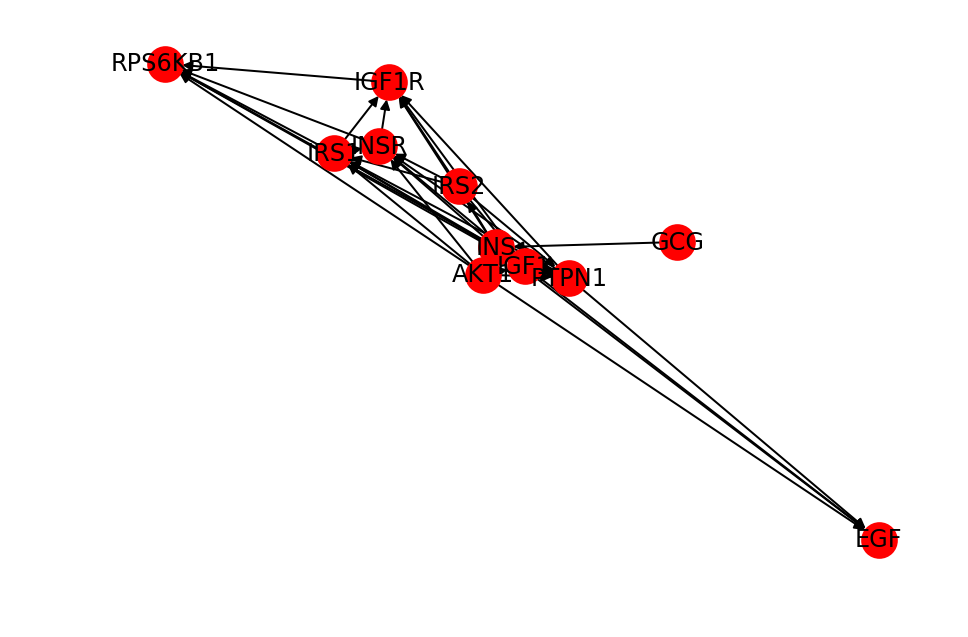

In [56]:
nx.draw(G, with_labels=True)
plt.show()

In real life our data are distributed in a multidimensional space (3D). A layout algorithm has to be applied to establish how the nodes and edges should be placed on the screen i a 2D version. A certain layout may simplify the graph and make it easier to analyse and interpret as closely related nodes are grouped together. Often we have to choose between a dozen of different layout algorithms. Here we start by applying the Fruchterman Reingold layout algorithm, which is a force-directed layout.

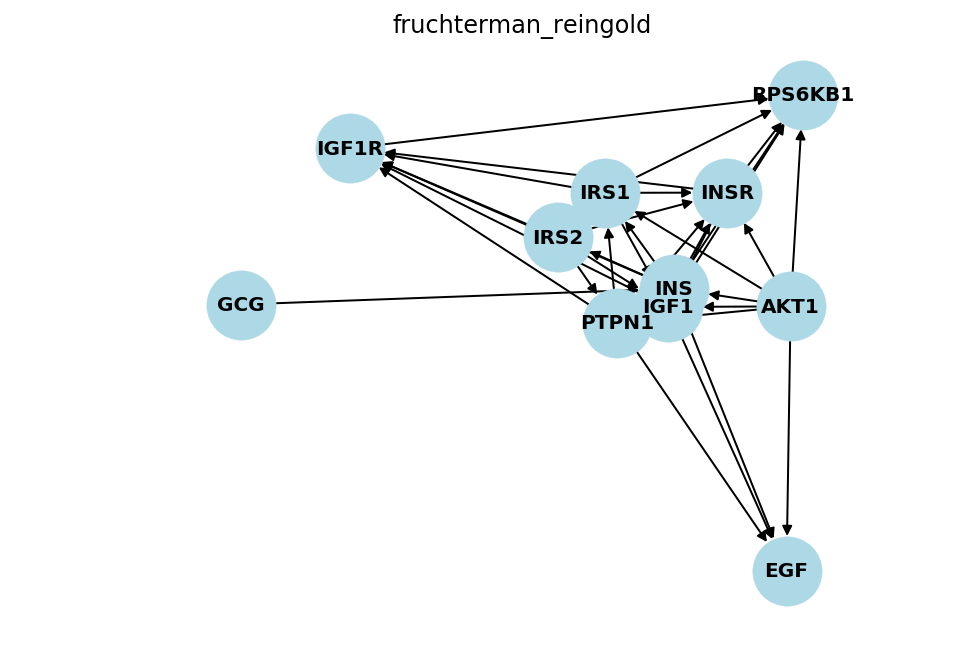

In [69]:
# Fruchterman Reingold
nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


You can also try out some of the other layout options in Networkx. Instead of Fruchterman_Reingold try circular, random and spectral.

In [ ]:

# circular


# random


# spectral




In the graphs we have made so far, the direction of the edges were not given. If Mads was playing with Anna, then Anna was also playing with Mads. If instead we are dealing with situations were e.g. a protein activate another protein, we would like to add a direction on the relationship - going from the activating protein towards the activated protein. We do that by making a directed graph.

In networkx we use the command nx.DiGraph() to indicate that we now want to make a directed graph. 

Be aware that one edge can go in both directions, indicated by an arrow in both ends of the edge.

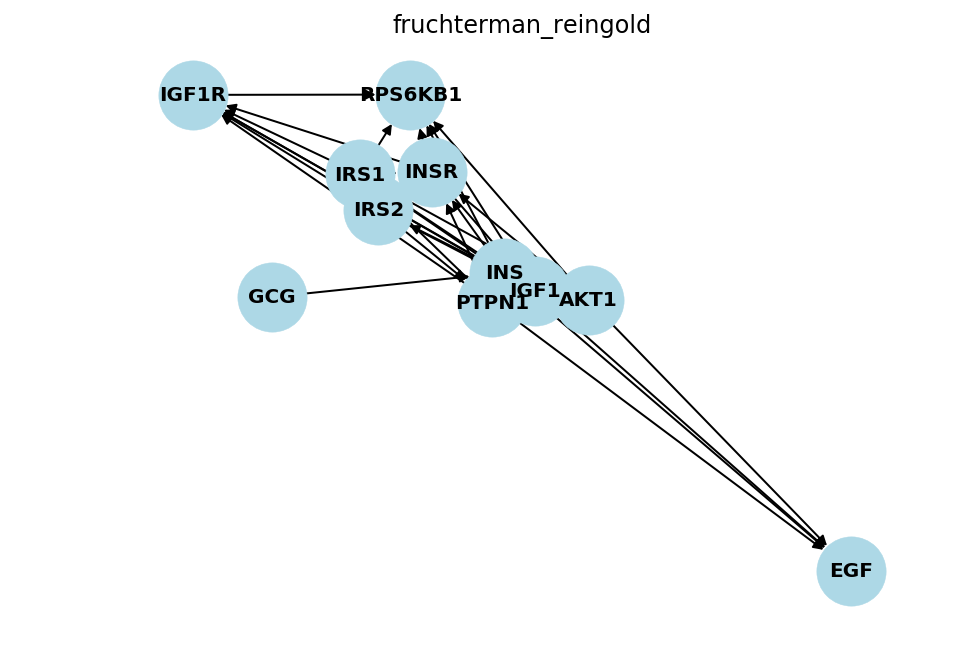

In [99]:
G = nx.DiGraph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


Now, try to make a directed network with a circular layout, green nodes and where the labels have a white font. Add a header to the figure saying 'circular'

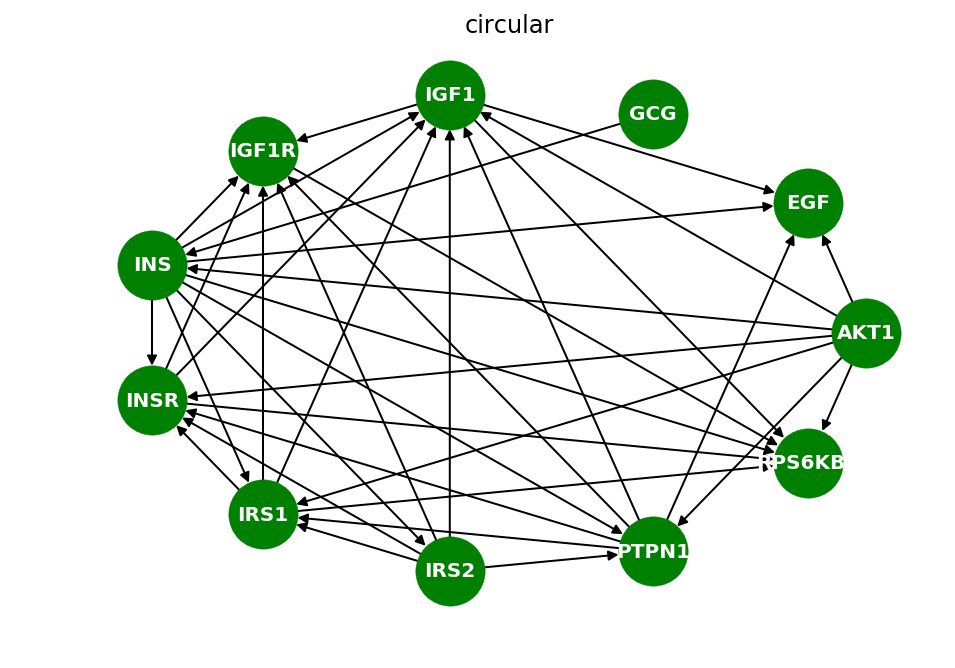

In [75]:
# Directed circular graph with green nodes and white labels


**Add your answers here**
*(double-click here to edit the cell)*

***Question I: What should you include in your code to make the labels white?***

_Answer_


### Exercise 3 - Density, shortest paths and betweenness centrality

We will now introduce a few more terms related to graphs and show how networks can be represented as a plot instead of a graph. 

We start by calculation of the density of the network. Whereas the centrality is connected to the individual nodes, the density is related to the network and describes the portion of the potential connections in a network that are actual connections, i.e. how many of the potential edges are given in the network. For this network we will see that around one third of all the potential connections are actually given in the network.

In [36]:
# Graph density:
nx.density(G)

0.33636363636363636

We can also study the paths through the network. Often we will be most interested in finding the shortest path between two nodes, e.g. the shortest way that a signal can travel from one protein to another. E.g. the shortest path from GCG to EGF. 

In [100]:
nx.shortest_path(G, 'GCG', 'EGF')

['GCG', 'INS', 'EGF']

Now, what happens if we take the shortest path the other way around - from EGF to GCG?

In [ ]:
# Shortest path from EGF to GCG


Use the code above to change the graph from a directed graph to an undirected graph and then try the same.

In [ ]:
# Transforming the graph into an undirected graph

G = nx.__(G)

G.add_nodes_from(node_names)
G.add_edges_from(edges)


In [ ]:
# Shortest path from EGF to GCG

Select two proteins of your own and find the shortest path between them.

In [ ]:
# Shortest path from __ to __

Knowing about the concepts of shortest path and centrality, we can now meassure the betweenness centrality. Betweenness centrality is a measure of centrality in a graph based on shortest paths. The betweenness centrality for each node (here proteins) is the number of shortest paths that pass through the node. 

You can say that the higher betweenness centrality a node has, the more control the node has over the network, because more information will pass through that node. In an ego-centeret network it is expected that the ego (here Insulin) will have the highest betweenness centrality. 

<BarContainer object of 11 artists>

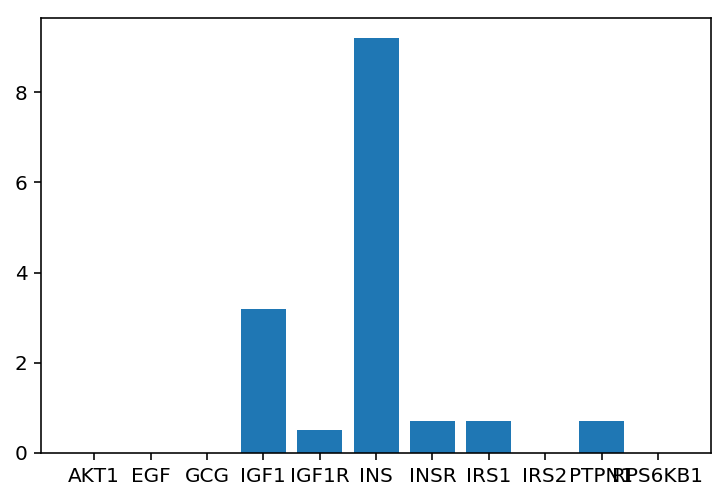

In [76]:
btws = nx.betweenness_centrality(G, normalized=False)
plt.bar(list(btws.keys()), list(btws.values()))

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: How many proteins is in the shortest path from GCG to EGF (excluding GCG and EGF)?***

_Answer_


***Question II: Which of the proteins in the insulin network has the second highest betweenness centrality?***

_Answer_


### Exercise 4 - Networks as matrices and arrays

We will end this notebook with demonstrating how a matrix plot of a network can be made. We use the nxviz function from MatrixPlot for this. 

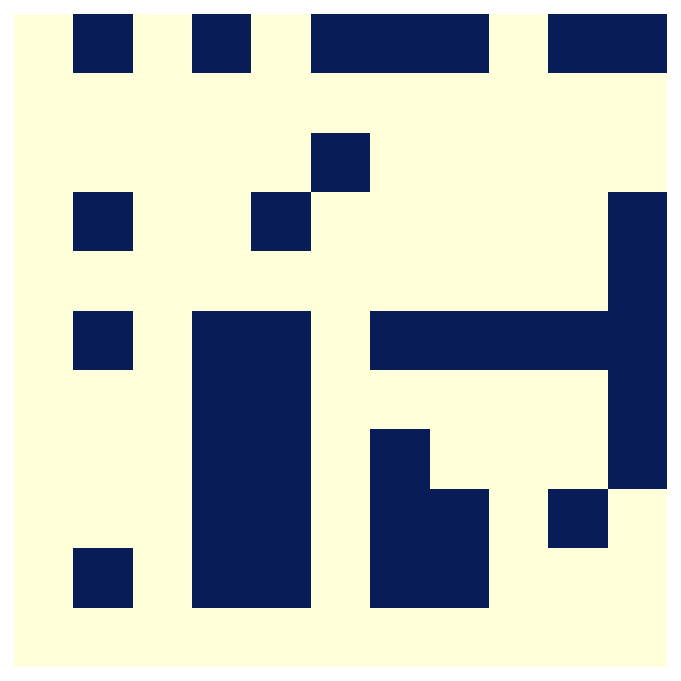

In [104]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

Depending on whether or not your present network is given as a directed or undirected graph, the plot will have a symmetric or asymmetric structure. 

In [110]:
# Transform the graph to a directed or undirected graph 



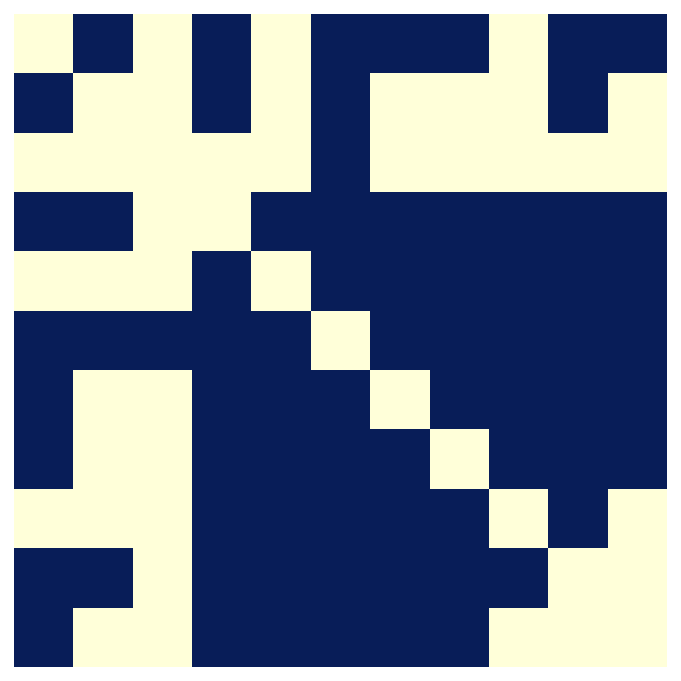

In [111]:
# Make a new Matrixplot



We can also use an array function from numpy to make an array of the graph instead of a matrix plot.

In [113]:
A1 = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
A1

array([[0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.]])

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: ????***

_Answer_



